### Import Preprocessed Data

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(Path("../Resources/master.csv"))

# Review the DataFrame
df.head()

,timestamp,open,high,low,close,volume,trade_count,vwap,actual_returns,sma_fast,sma_slow,signal
0,2015-01-20 06:00:00+00:00,215.00,218.00,208.00,218.00,0.040000,4,214.500000,-0.033302,209.170000,219.525,-1
1,2015-01-21 06:00:00+00:00,245.50,257.73,216.59,246.62,4.330000,236,229.540393,0.131284,230.043333,216.643,1
2,2015-01-22 06:00:00+00:00,217.59,239.67,217.59,226.32,0.030000,3,227.860000,-0.082313,230.313333,210.376,-1
3,2015-01-23 06:00:00+00:00,230.00,235.00,215.00,235.00,0.180001,10,230.277693,0.038353,235.980000,207.876,1
4,2015-01-24 06:00:00+00:00,248.02,255.05,247.55,250.91,6.637441,15,252.211775,0.067702,237.410000,211.004,1


In [3]:
df["signal"] = df["signal"].shift(-1)
df.dropna(inplace = True)
df.head()

,timestamp,open,high,low,close,volume,trade_count,vwap,actual_returns,sma_fast,sma_slow,signal
0,2015-01-20 06:00:00+00:00,215.00,218.00,208.00,218.00,0.040000,4,214.500000,-0.033302,209.170000,219.525,1.0
1,2015-01-21 06:00:00+00:00,245.50,257.73,216.59,246.62,4.330000,236,229.540393,0.131284,230.043333,216.643,-1.0
2,2015-01-22 06:00:00+00:00,217.59,239.67,217.59,226.32,0.030000,3,227.860000,-0.082313,230.313333,210.376,1.0
3,2015-01-23 06:00:00+00:00,230.00,235.00,215.00,235.00,0.180001,10,230.277693,0.038353,235.980000,207.876,1.0
4,2015-01-24 06:00:00+00:00,248.02,255.05,247.55,250.91,6.637441,15,252.211775,0.067702,237.410000,211.004,1.0


In [4]:
df.timestamp = pd.to_datetime(df.timestamp)
df = df.set_index("timestamp")
df.head()

,open,high,low,close,volume,trade_count,vwap,actual_returns,sma_fast,sma_slow,signal
timestamp,,,,,,,,,,,
2015-01-20 06:00:00+00:00,215.00,218.00,208.00,218.00,0.040000,4,214.500000,-0.033302,209.170000,219.525,1.0
2015-01-21 06:00:00+00:00,245.50,257.73,216.59,246.62,4.330000,236,229.540393,0.131284,230.043333,216.643,-1.0
2015-01-22 06:00:00+00:00,217.59,239.67,217.59,226.32,0.030000,3,227.860000,-0.082313,230.313333,210.376,1.0
2015-01-23 06:00:00+00:00,230.00,235.00,215.00,235.00,0.180001,10,230.277693,0.038353,235.980000,207.876,1.0
2015-01-24 06:00:00+00:00,248.02,255.05,247.55,250.91,6.637441,15,252.211775,0.067702,237.410000,211.004,1.0


In [5]:
X = df[['sma_fast', 'sma_slow','actual_returns']].dropna()
y = df['signal']

display(X.head())
display(y.head())

,sma_fast,sma_slow,actual_returns
timestamp,,,
2015-01-20 06:00:00+00:00,209.170000,219.525,-0.033302
2015-01-21 06:00:00+00:00,230.043333,216.643,0.131284
2015-01-22 06:00:00+00:00,230.313333,210.376,-0.082313
2015-01-23 06:00:00+00:00,235.980000,207.876,0.038353
2015-01-24 06:00:00+00:00,237.410000,211.004,0.067702


timestamp
2015-01-20 06:00:00+00:00    1.0
2015-01-21 06:00:00+00:00   -1.0
2015-01-22 06:00:00+00:00    1.0
2015-01-23 06:00:00+00:00    1.0
2015-01-24 06:00:00+00:00    1.0
Name: signal, dtype: float64

In [6]:
df.isna().sum()

open              0
high              0
low               0
close             0
volume            0
trade_count       0
vwap              0
actual_returns    0
sma_fast          0
sma_slow          0
signal            0
dtype: int64

### Scale the data using StandardScaler

In [7]:
# Split the dataset using train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)

In [8]:
X.index.min(), X.index.max()

(Timestamp('2015-01-20 06:00:00+0000', tz='UTC'),
 Timestamp('2021-12-31 06:00:00+0000', tz='UTC'))

In [9]:
X_train = X.loc[:"2021-06"]
X_test =  X.loc["2021-07":]

In [10]:
X_train.shape, X_test.shape

((2773, 3), (477, 3))

In [11]:
y_train = y[:X_train.shape[0]]
y_test =  y[X_train.shape[0]:]

In [12]:
y_train.shape, y_test.shape

((2773,), (477,))

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

### Using KNN

We'll start with k=1.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# try K=5
knn = KNeighborsClassifier(n_neighbors=5)

In [18]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### Predictions and Evaluations

In [19]:
# Create predictions using the testing data
pred = knn.predict(X_test_scaled)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(confusion_matrix(y_test,pred))

[[114 119]
 [108 136]]


In [22]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        -1.0       0.51      0.49      0.50       233
         1.0       0.53      0.56      0.55       244

    accuracy                           0.52       477
   macro avg       0.52      0.52      0.52       477
weighted avg       0.52      0.52      0.52       477



### Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value:

In [23]:
error_rate = []

for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

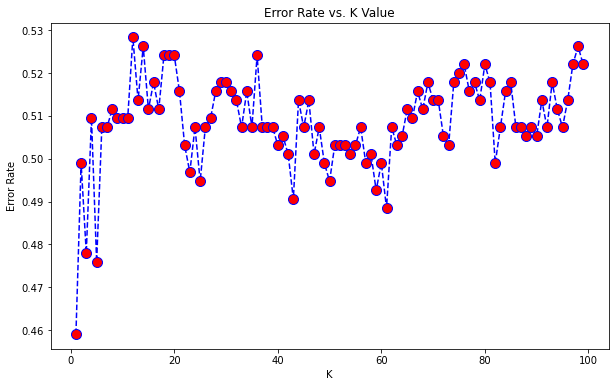

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Here we can see that that after around k=1 the error rate just tends to be the lowest Let's retrain the model with that and check the classification report!


In [25]:
# A QUICK COMPARISON TO K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[129 104]
 [115 129]]


              precision    recall  f1-score   support

        -1.0       0.53      0.55      0.54       233
         1.0       0.55      0.53      0.54       244

    accuracy                           0.54       477
   macro avg       0.54      0.54      0.54       477
weighted avg       0.54      0.54      0.54       477



### Create trading strategy using the model

In [26]:
X_test

,sma_fast,sma_slow,actual_returns
timestamp,,,
2021-07-01 05:00:00+00:00,34052.440000,34336.226,-0.022939
2021-07-01 05:00:00+00:00,33640.703333,34328.526,-0.012326
2021-07-02 05:00:00+00:00,33474.710000,34273.545,0.021207
2021-07-02 05:00:00+00:00,33507.673333,34197.745,-0.005621
2021-07-03 05:00:00+00:00,34067.673333,34188.914,0.034746
...,...,...,...
2021-12-30 06:00:00+00:00,46932.243333,47897.267,0.011481
2021-12-30 06:00:00+00:00,47071.310000,47693.011,-0.002253
2021-12-30 06:00:00+00:00,47259.976667,47507.671,0.002878


In [27]:
# Predicted Signal
predictions_df= pd.DataFrame(index=X_test.index)
predictions_df['Predicted_signals'] = pred

In [28]:
predictions_df['Actual Returns'] = X_test["actual_returns"]
predictions_df['Strategy Returns'] = X_test["actual_returns"] * predictions_df['Predicted_signals'] 


In [29]:
display(predictions_df.head())
display(predictions_df.tail())

,Predicted_signals,Actual Returns,Strategy Returns
timestamp,,,
2021-07-01 05:00:00+00:00,-1.0,-0.022939,0.022939
2021-07-01 05:00:00+00:00,-1.0,-0.012326,0.012326
2021-07-02 05:00:00+00:00,-1.0,0.021207,-0.021207
2021-07-02 05:00:00+00:00,-1.0,-0.005621,0.005621
2021-07-03 05:00:00+00:00,1.0,0.034746,0.034746


,Predicted_signals,Actual Returns,Strategy Returns
timestamp,,,
2021-12-30 06:00:00+00:00,-1.0,0.011481,-0.011481
2021-12-30 06:00:00+00:00,1.0,-0.002253,-0.002253
2021-12-30 06:00:00+00:00,1.0,0.002878,0.002878
2021-12-31 06:00:00+00:00,1.0,-0.002684,-0.002684
2021-12-31 06:00:00+00:00,1.0,0.002043,0.002043


### Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

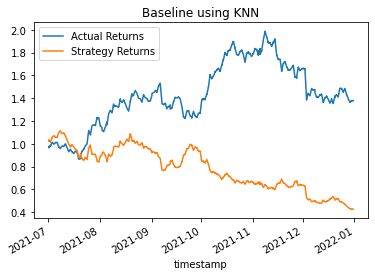

In [30]:
knn_plot = (1 + predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot(title="Baseline using KNN").get_figure()
knn_plot.savefig('../Plots/knn_Plot.png')

In [31]:
(1 + predictions_df[["Strategy Returns"]]).describe()

,Strategy Returns
count,477.000000
mean,0.998452
std,0.021485
min,0.837128
25%,0.996607
50%,0.999632
75%,1.001671
max,1.113696


In [32]:
(1 + predictions_df[["Strategy Returns"]]).cumprod().tail(1)

,Strategy Returns
timestamp,
2021-12-31 06:00:00+00:00,0.427001


##  Evaluate a New Machine Learning Classifier - RandomForest

In [33]:
# Import a new classifier from SKLearn
from sklearn.ensemble import RandomForestClassifier

# Initiate the model instance
rf_model = RandomForestClassifier()

### Using the original training data as the baseline model, fit another model with the new classifier.

In [34]:
# Fit the model using the training data
model = rf_model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
rf_pred = model.predict(X_test_scaled)

# Review the model's predicted values
rf_pred[:10]

array([ 1.,  1., -1.,  1., -1., -1., -1., -1., -1., -1.])

### Backtest the new model to evaluate its performance.

In [35]:
# Use a classification report to evaluate the model using the predictions and testing data
rf_report = classification_report(y_test, pred)

# Print the classification report
print(rf_report)

              precision    recall  f1-score   support

        -1.0       0.53      0.55      0.54       233
         1.0       0.55      0.53      0.54       244

    accuracy                           0.54       477
   macro avg       0.54      0.54      0.54       477
weighted avg       0.54      0.54      0.54       477



In [36]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
rf_predictions_df = pd.DataFrame(index = X_test.index)

# Add the SVM model predictions to the DataFrame
rf_predictions_df['Predicted_signals'] = rf_pred

# Add the actual returns to the DataFrame
rf_predictions_df["Actual Returns"] =  X_test["actual_returns"]

# Add the strategy returns to the DataFrame
rf_predictions_df["Strategy Returns"] = rf_predictions_df["Actual Returns"]  * rf_predictions_df['Predicted_signals']


# Review the DataFrame
display(rf_predictions_df.head())
display(rf_predictions_df.tail())


,Predicted_signals,Actual Returns,Strategy Returns
timestamp,,,
2021-07-01 05:00:00+00:00,1.0,-0.022939,-0.022939
2021-07-01 05:00:00+00:00,1.0,-0.012326,-0.012326
2021-07-02 05:00:00+00:00,-1.0,0.021207,-0.021207
2021-07-02 05:00:00+00:00,1.0,-0.005621,-0.005621
2021-07-03 05:00:00+00:00,-1.0,0.034746,-0.034746


,Predicted_signals,Actual Returns,Strategy Returns
timestamp,,,
2021-12-30 06:00:00+00:00,-1.0,0.011481,-0.011481
2021-12-30 06:00:00+00:00,1.0,-0.002253,-0.002253
2021-12-30 06:00:00+00:00,1.0,0.002878,0.002878
2021-12-31 06:00:00+00:00,1.0,-0.002684,-0.002684
2021-12-31 06:00:00+00:00,1.0,0.002043,0.002043


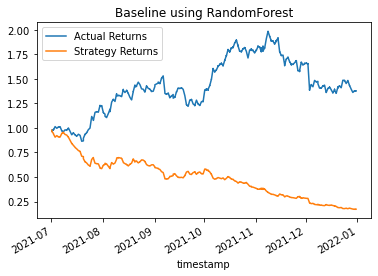

In [37]:
# Plot the actual returns versus the strategy returns
random_forest_plot = (1 + rf_predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot(title="Baseline using RandomForest").get_figure()
random_forest_plot.savefig('../Plots/random_forest_plot.png')

In [38]:
(1 + rf_predictions_df[["Strategy Returns"]]).describe()

,Strategy Returns
count,477.000000
mean,0.996531
std,0.021259
min,0.837128
25%,0.993827
50%,0.998924
75%,1.000611
max,1.113696


In [39]:
(1 + rf_predictions_df[["Strategy Returns"]]).cumprod().tail(1)

,Strategy Returns
timestamp,
2021-12-31 06:00:00+00:00,0.170805
